en iyi parametreler: 
 {'criterion': 'gini', 'max_depth': 150}
Doğruluk: 0.8524590163934426


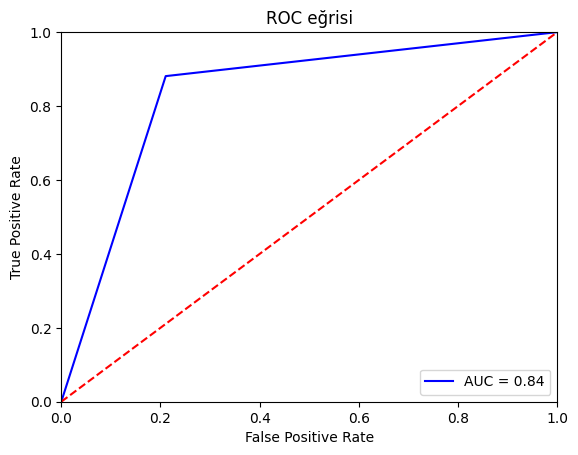

In [1]:
import numpy as np
import PIL.Image as img
import os
import pandas as pd

duman_yangin_yok="/kaggle/input/orman-yangn-veri/Orman Yangını Veri/negative"
duman_yangin_var="/kaggle/input/orman-yangn-veri/Orman Yangını Veri/positive"

def dosya(yol):
    return [os.path.join(yol,f) for f in os.listdir(yol)]

def veri_donusturme(klasor_adi,sinif_adi):

    goruntuler=dosya(klasor_adi)
    
    goruntu_sinif=[]
    for goruntu in goruntuler:
        goruntu_oku= img.open(goruntu).convert('L')
        gorunu_boyutlandirma=goruntu_oku.resize((28,28))
        goruntu_donusturme=np.array(gorunu_boyutlandirma).flatten()
        if sinif_adi=="yok":
            veriler=np.append (goruntu_donusturme, [0])
            
        elif sinif_adi=="var":
            veriler=np.append (goruntu_donusturme, [1])
            
        else:
            continue
        goruntu_sinif.append(veriler)

    return goruntu_sinif


duman_yangin_yok_veri=veri_donusturme(duman_yangin_yok,"yok")
duman_yangin_yok_df=pd.DataFrame(duman_yangin_yok_veri)

duman_yangin_var_veri=veri_donusturme(duman_yangin_var,"var")
duman_yangin_var_df=pd.DataFrame(duman_yangin_var_veri)

tum_veri= pd.concat([duman_yangin_yok_df, duman_yangin_var_df])


import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV

Giris=np.array(tum_veri)[:,:784]
Cikis=np.array(tum_veri)[:,784]
Giris_train, Giris_test, Cikis_train, Cikis_test = train_test_split(Giris, Cikis, test_size=0.2, random_state=1)

agac_parametreleri = {'criterion':['gini','entropy'],'max_depth':[2,5,10,20,30,90,120,150]}


arama_algoritmasi = GridSearchCV(DecisionTreeClassifier(), agac_parametreleri, cv=5)
arama_algoritmasi.fit(Giris_train,Cikis_train)
en_iyi_parametreler=arama_algoritmasi.best_params_

print("en iyi parametreler: \n",en_iyi_parametreler)

model = DecisionTreeClassifier(criterion=en_iyi_parametreler["criterion"],
                               max_depth=en_iyi_parametreler["max_depth"])

clf = model.fit(Giris_train,Cikis_train)

Cikis_pred = clf.predict(Giris_test)
print("Doğruluk:",metrics.accuracy_score(Cikis_test, Cikis_pred))


import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Cikis_test, Cikis_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC eğrisi')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()